#### Outlier
Outliers are unusual data points that differ significantly from rest of the samples. They can occur due to an error in data collection process or they are just legitimate data points and represent natural variation.

In [1]:
import pandas as pd
import openpyxl

In [2]:
file_path = "D:/Youtube Videos/codebasics/py-master/ML/FeatureEngineering/1_outliers/"
heights = pd.read_csv(file_path + "heights.csv")
test_scores = pd.read_excel(file_path + 'test_scores.xlsx',engine='openpyxl')
bhp = pd.read_csv(file_path + "bhp.csv")
htdf = heights.copy()
tsdf = test_scores.copy()
bhdf = bhp.copy()

In [22]:
htdf

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [16]:
max_thresold = htdf['height'].quantile(0.95)
min_thresold = htdf['height'].quantile(0.05)

In [17]:
max_thresold

9.689999999999998

In [18]:
min_thresold

3.6050000000000004

In [19]:
htdf[htdf['height']>max_thresold]

,name,height
9,imran,14.5


In [20]:
htdf[htdf['height']<min_thresold]

,name,height
12,yoseph,1.2


In [26]:
htdf[(htdf['height']<max_thresold) & (htdf['height']>min_thresold)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [27]:
bhdf.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [29]:
bhdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [28]:
bhdf.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [55]:
print(format(0.01,"%"))

1.000000%


In [59]:
min_thresold, max_thresold = bhdf.price_per_sqft.quantile([0.001, 0.999])
min_thresold, max_thresold

(1366.184, 50959.36200000099)

In [60]:
bhdf_thresold = bhdf[(bhdf['price_per_sqft']<max_thresold) & (bhdf['price_per_sqft']>min_thresold)]

In [61]:
bhdf_thresold

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [17]:
tsdf

,Unnamed: 0,test score (from 100),percentage,percentile rank
0,mohan,69,0.69,1.000
1,maria,56,0.56,0.500
2,sakib,45,0.45,0.250
3,tao,32,0.32,0.125
4,virat,27,0.27,0.000
5,khusbu,65,0.65,0.750
6,dmitry,61,0.61,0.625
7,selena,66,0.66,0.875
8,john,45,0.45,0.250


In [33]:
tsdf.rename(columns={"Unnamed: 0": "Students"}, inplace=True)

In [ ]:
tsdf['percentage'] = tsdf['percentage'].apply(lambda x: "{0:.2f}%".format(x*100))

In [35]:
tsdf['percentile rank'] = tsdf['percentile rank'].apply(lambda x: "{0:.2f}%".format(x*100))

In [36]:
tsdf

,Students,test score (from 100),percentage,percentile rank
0,mohan,69,69.00%,100.00%
1,maria,56,56.00%,50.00%
2,sakib,45,45.00%,25.00%
3,tao,32,32.00%,12.50%
4,virat,27,27.00%,0.00%
5,khusbu,65,65.00%,75.00%
6,dmitry,61,61.00%,62.50%
7,selena,66,66.00%,87.50%
8,john,45,45.00%,25.00%


#### Outlier detection and removal_ z score, standard deviation _ Feature engineering

In [37]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
file_path = "D:/Youtube Videos/codebasics/py-master/ML/FeatureEngineering/2_outliers_z_score/"
df = pd.read_csv(file_path + "heights.csv")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  10000 non-null  object 
 1   height  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [41]:
df.sample(10)

,gender,height
9012,Female,62.158971
9034,Female,58.345533
2802,Male,72.252705
5625,Female,68.006089
7655,Female,62.754392
3113,Male,68.128991
9878,Female,60.602925
8678,Female,66.437560
4584,Male,66.747273
9913,Female,58.351003


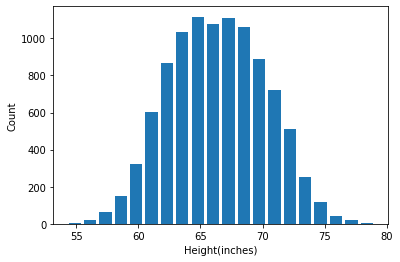

In [44]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

In [45]:
df.height.max()

78.99874235

In [46]:
df.height.min()

54.26313333

In [47]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


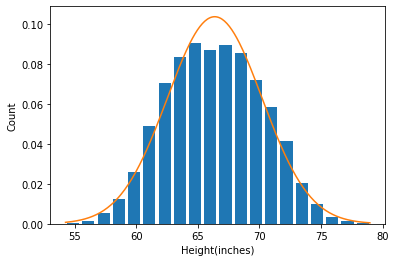

In [52]:
from scipy.stats import norm
import numpy as np

plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height(inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

In [56]:
df.height.mean()

66.367559754866

In [57]:
df.height.std()

3.847528120795573

In [61]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [63]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

54.824975392479274

In [66]:
df[(df.height > upper_limit) | (df.height < lower_limit)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [69]:
df_no_outlier_std_dev = df[(df.height < upper_limit) & (df.height > lower_limit)]

In [70]:
df_no_outlier_std_dev

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


#### Calculate the Z Score

In [71]:
df['zscore'] = (df.height - df.height.mean() ) / df.height.std()

In [72]:
df

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [55]:
df[df['zscore']>3] 

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [74]:
df[df['zscore'] < -3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [75]:
df[(df['zscore']>3) | (df['zscore'] < -3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


## Outlier detection and removal using IQR

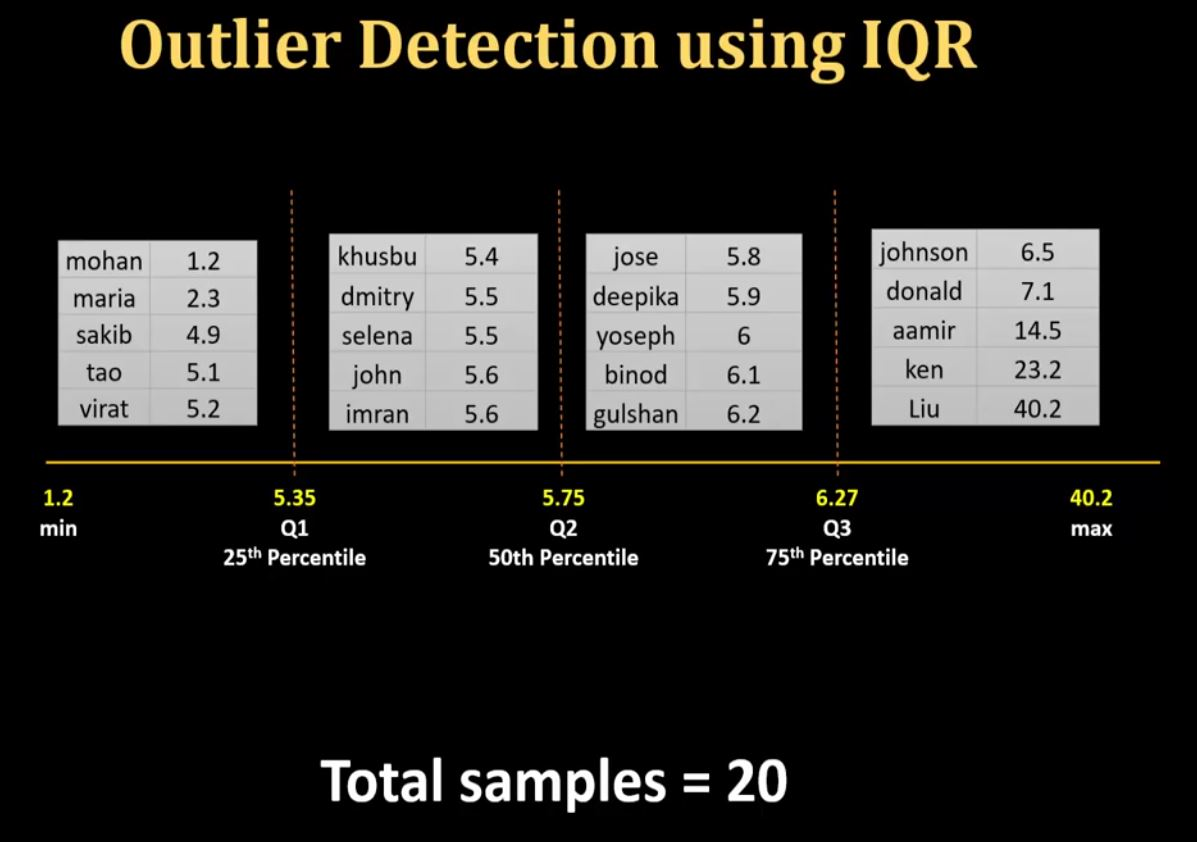

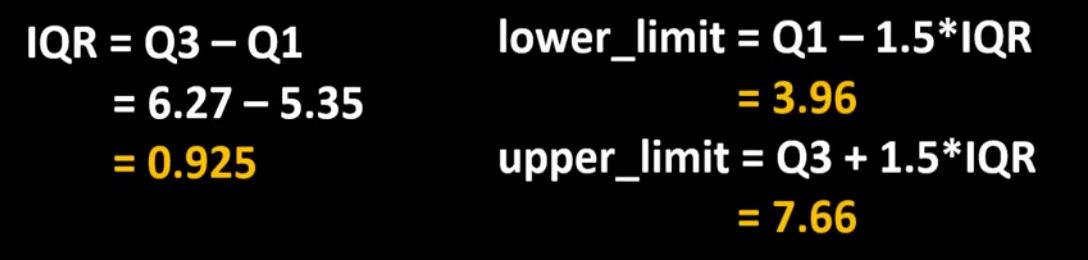

In [4]:
file_path = "D:/Youtube Videos/codebasics/py-master/ML/FeatureEngineering/3_outlier_IQR/"
df = pd.read_csv(file_path + "height.csv")

In [5]:
df.sample(10)

,name,height
16,donald,7.1
10,jose,5.8
6,dmitry,5.5
8,john,5.6
3,tao,5.1
4,virat,5.2
18,ken,23.2
7,selena,5.5
1,maria,2.3
5,khusbu,5.4


In [6]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


In [14]:
#Another way to calculate;
q1,q3 = df.height.quantile([0.25, 0.75])
q1,q3

(5.3500000000000005, 6.275)

In [16]:
IQR = q3-q1
IQR

0.9249999999999998

In [17]:
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
lower_limit, upper_limit

(3.962500000000001, 7.6625)

In [19]:
df_no_outlier = df[(df.height > lower_limit) & (df.height < upper_limit)]
df_no_outlier

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9
